## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Collection

In [2]:
bank_data = pd.read_csv('Datasets/bankdata.csv')
bank_data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
452,453,15710825,Ch'en,592,Spain,Male,31,7,110071.10,1,0,0,43921.36,0
4785,4786,15702138,Swift,510,France,Female,22,3,156834.34,1,0,0,44374.44,0
9957,9958,15672237,Oluchi,633,France,Male,25,1,0.00,1,1,0,100598.98,0
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
436,437,15693737,Carr,627,Germany,Female,30,4,79871.02,2,1,0,129826.89,0


In [3]:
bank_data.shape

(10000, 14)

## Information about the data

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Check null values in the dataset

In [5]:
bank_data.sample(10).isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Overall statistics about the numerical features

In [6]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Overall statistics about the categorical features

In [7]:
bank_data.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Dropping irrelevant features

In [8]:
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
bank_data.drop(columns = ['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [10]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding categorical data

In [11]:
bank_data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
bank_data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
encoder = LabelEncoder()
bank_data['Geography'] = encoder.fit_transform(bank_data['Geography'])
bank_data['Gender'] = encoder.fit_transform(bank_data['Gender'])

In [14]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Target data distribution

In [15]:
bank_data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

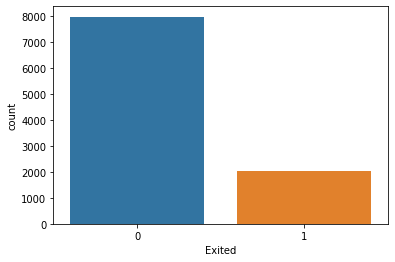

In [16]:
sns.countplot(bank_data['Exited'])

`0 - Not exited` `1- Exited`

`Our data is imbalanced`

## Splitting the features and the target

In [17]:
X = bank_data.drop('Exited', axis =1)
y = bank_data.Exited
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


## Handling imbalanced data using SMOTE (Synthetic Minority Oversampling Technique)

In [18]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [19]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Splitting training and test data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 2)

In [21]:
X_train.shape, X_test.shape

((12740, 10), (3186, 10))

## Feature Scaling 
### Standard Scaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.12234893  0.43907894  1.20435512 ...  0.77959852 -0.76522099
   1.18755819]
 [-0.84302561  1.76936805  1.20435512 ...  0.77959852 -0.76522099
   0.47593615]
 [-0.42809055 -0.89121017  1.20435512 ...  0.77959852 -0.76522099
   1.13570144]
 ...
 [ 2.1925519  -0.89121017  1.20435512 ...  0.77959852 -0.76522099
   1.64047087]
 [-1.07233182  0.43907894  1.20435512 ...  0.77959852 -0.76522099
   1.32104493]
 [ 0.05236057 -0.89121017 -0.83031988 ...  0.77959852 -0.76522099
   0.8795971 ]]


## Model Training

## 1.Logistic Regression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

`
Since our data is imbalanced accuracy score is baised and not preferable. So we have to check precision, recall and f1 score`

Accuracy, Precison, Recall, F1 score, Confusion matrix

In [24]:
test_accuracy_1 = accuracy_score(y_test, y_pred1)
test_precision_1 = precision_score(y_test, y_pred1)
test_recall_1 = recall_score(y_test, y_pred1)
test_f1_1 = f1_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print('Accuracy: ',test_accuracy_1 )
print('Precision: ',test_precision_1 )
print('Recall: ',test_recall_1 )
print('F1 score: ',test_f1_1 )
print('Confusion matrix: \n',conf_matrix1)

Accuracy:  0.7752667922159447
Precision:  0.7685643564356436
Recall:  0.7840909090909091
F1 score:  0.7762500000000001
Confusion matrix: 
 [[1228  374]
 [ 342 1242]]


## 2.SVM

In [25]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)

Accuracy, Precison, Recall, F1 score, Confusion matrix

In [26]:
test_accuracy_2 = accuracy_score(y_test, y_pred2)
test_precision_2 = precision_score(y_test, y_pred2)
test_recall_2 = recall_score(y_test, y_pred2)
test_f1_2 = f1_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print('Accuracy: ',test_accuracy_2 )
print('Precision: ',test_precision_2 )
print('Recall: ',test_recall_2 )
print('F1 score: ',test_f1_2 )
print('Confusion matrix: \n',conf_matrix2)

Accuracy:  0.8333333333333334
Precision:  0.8429967426710098
Recall:  0.8169191919191919
F1 score:  0.8297531260019237
Confusion matrix: 
 [[1361  241]
 [ 290 1294]]


## 3.KNN classifier

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [28]:
test_accuracy_3 = accuracy_score(y_test, y_pred3)
test_precision_3 = precision_score(y_test, y_pred3)
test_recall_3 = recall_score(y_test, y_pred3)
test_f1_3 = f1_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print('Accuracy: ',test_accuracy_3)
print('Precision: ',test_precision_3)
print('Recall: ',test_recall_3)
print('F1 score: ',test_f1_3)
print('Confusion matrix: \n',conf_matrix3)

Accuracy:  0.8192090395480226
Precision:  0.8065693430656934
Recall:  0.8371212121212122
F1 score:  0.8215613382899627
Confusion matrix: 
 [[1284  318]
 [ 258 1326]]


## 4.Decision Tree Classifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [30]:
test_accuracy_4 = accuracy_score(y_test, y_pred4)
test_precision_4 = precision_score(y_test, y_pred4)
test_recall_4 = recall_score(y_test, y_pred4)
test_f1_4 = f1_score(y_test, y_pred4)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
print('Accuracy: ',test_accuracy_4)
print('Precision: ',test_precision_4)
print('Recall: ',test_recall_4)
print('F1 score: ',test_f1_4)
print('Confusion matrix: \n',conf_matrix4)

Accuracy:  0.7849968612680477
Precision:  0.7786732796032239
Recall:  0.7929292929292929
F1 score:  0.7857366280888332
Confusion matrix: 
 [[1245  357]
 [ 328 1256]]


## 5.Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)

In [32]:
test_accuracy_5 = accuracy_score(y_test, y_pred5)
test_precision_5 = precision_score(y_test, y_pred5)
test_recall_5 = recall_score(y_test, y_pred5)
test_f1_5 = f1_score(y_test, y_pred5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
print('Accuracy: ',test_accuracy_5)
print('Precision: ',test_precision_5)
print('Recall: ',test_recall_5)
print('F1 score: ',test_f1_5)
print('Confusion matrix: \n',conf_matrix5)

Accuracy:  0.8615819209039548
Precision:  0.8689477081988379
Recall:  0.8497474747474747
F1 score:  0.8592403447175231
Confusion matrix: 
 [[1399  203]
 [ 238 1346]]


## 6.Gradient Boosting Classifier

In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred6 = gbc.predict(X_test)

In [34]:
test_accuracy_6 = accuracy_score(y_test, y_pred6)
test_precision_6 = precision_score(y_test, y_pred6)
test_recall_6 = recall_score(y_test, y_pred6)
test_f1_6 = f1_score(y_test, y_pred6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
print('Accuracy: ',test_accuracy_6)
print('Precision: ',test_precision_6)
print('Recall: ',test_recall_6)
print('F1 score: ',test_f1_6)
print('Confusion matrix: \n',conf_matrix6)

Accuracy:  0.8386691776522285
Precision:  0.8496732026143791
Recall:  0.8207070707070707
F1 score:  0.8349389852280026
Confusion matrix: 
 [[1372  230]
 [ 284 1300]]


In [35]:
final_data = pd.DataFrame({'Models':['Logistic Regression','SVM','KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
                          'Accuracy':[accuracy_score(y_test, y_pred1),
                                     accuracy_score(y_test, y_pred2),
                                     accuracy_score(y_test, y_pred3),
                                     accuracy_score(y_test, y_pred4),
                                     accuracy_score(y_test, y_pred5),
                                     accuracy_score(y_test, y_pred6)],
                          'Precision':[precision_score(y_test, y_pred1),
                                     precision_score(y_test, y_pred2),
                                     precision_score(y_test, y_pred3),
                                     precision_score(y_test, y_pred4),
                                     precision_score(y_test, y_pred5),
                                     precision_score(y_test, y_pred6)],
                          'Recall':[recall_score(y_test, y_pred1),
                                     recall_score(y_test, y_pred2),
                                     recall_score(y_test, y_pred3),
                                     recall_score(y_test, y_pred4),
                                     recall_score(y_test, y_pred5),
                                     recall_score(y_test, y_pred6)],
                          'F1 Score':[f1_score(y_test, y_pred1),
                                     f1_score(y_test, y_pred2),
                                     f1_score(y_test, y_pred3),
                                     f1_score(y_test, y_pred4),
                                     f1_score(y_test, y_pred5),
                                     f1_score(y_test, y_pred6)]})
final_data

,Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.775267,0.768564,0.784091,0.776250
1,SVM,0.833333,0.842997,0.816919,0.829753
2,KNN,0.819209,0.806569,0.837121,0.821561
3,Decision Tree,0.784997,0.778673,0.792929,0.785737
4,Random Forest,0.861582,0.868948,0.849747,0.859240
5,Gradient Boosting,0.838669,0.849673,0.820707,0.834939


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

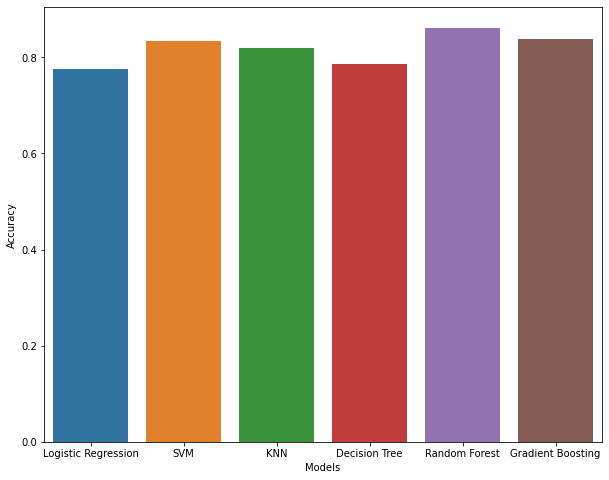

In [36]:
plt.figure(figsize = (10,8))
sns.barplot('Models','Accuracy',data = final_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Precision'>

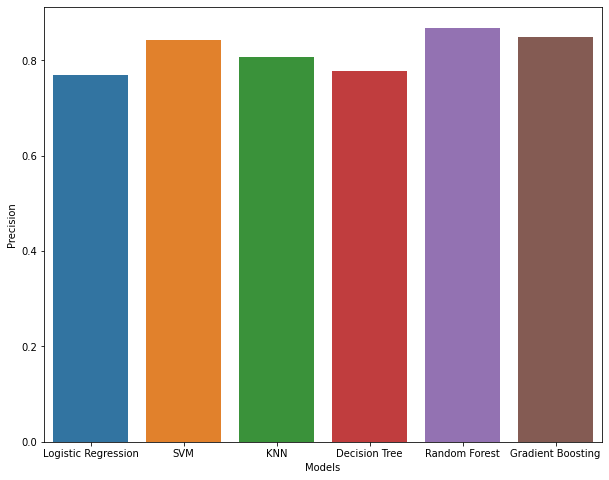

In [37]:
plt.figure(figsize = (10,8))
sns.barplot('Models','Precision',data = final_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Recall'>

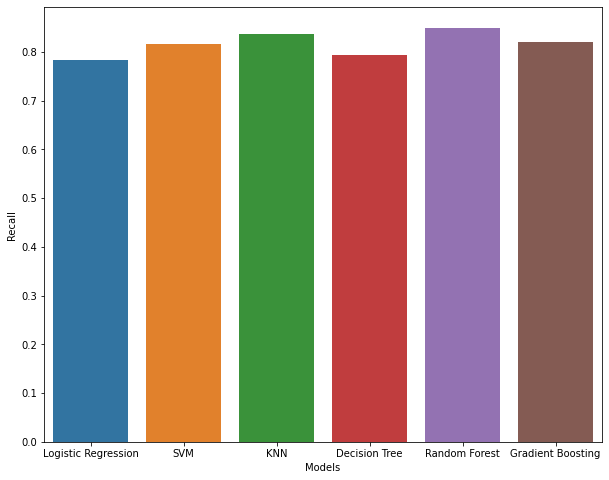

In [38]:
plt.figure(figsize = (10,8))
sns.barplot('Models','Recall',data = final_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='F1 Score'>

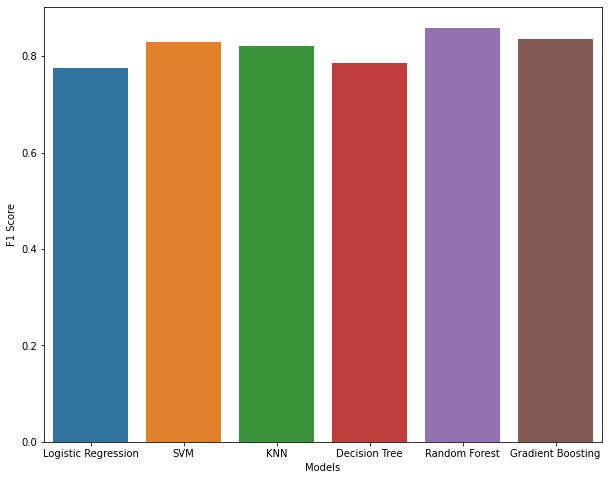

In [39]:
plt.figure(figsize = (10,8))
sns.barplot('Models','F1 Score',data = final_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

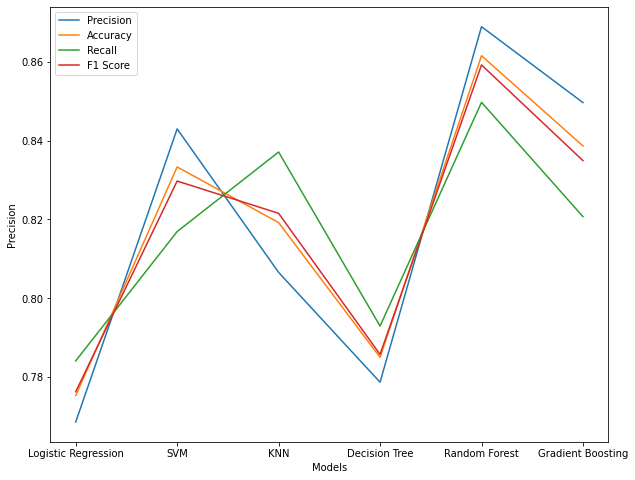

In [40]:
plt.figure(figsize = (10,8))
sns.lineplot('Models','Precision',data = final_data)
sns.lineplot('Models','Accuracy',data = final_data)
sns.lineplot('Models','Recall',data = final_data)
sns.lineplot('Models','F1 Score',data = final_data)
plt.legend(['Precision','Accuracy','Recall','F1 Score'])

## Random Forest is the selected model